<a href="https://colab.research.google.com/github/pb-roshith/Multi_Task_NLP_model_with_LSTM/blob/main/Multi_Task_NLP_model_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d nelgiriyewithana/emotions

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
License(s): other
  0% 0.00/15.7M [00:00<?, ?B/s]
100% 15.7M/15.7M [00:00<00:00, 1.21GB/s]


In [3]:
!kaggle datasets download -d gauravduttakiit/gender-based-violence-tweet-classification

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/gender-based-violence-tweet-classification
License(s): CC0-1.0
  0% 0.00/5.17M [00:00<?, ?B/s]
100% 5.17M/5.17M [00:00<00:00, 736MB/s]


In [4]:
!kaggle datasets download -d mrmorj/hate-speech-and-offensive-language-dataset

Dataset URL: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset
License(s): CC0-1.0
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 562MB/s]


In [5]:
from zipfile import ZipFile
dataset='/content/emotions.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("extracted successfully dude")

extracted successfully dude


In [6]:
from zipfile import ZipFile
dataset='/content/gender-based-violence-tweet-classification.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("extracted successfully dude")

extracted successfully dude


In [7]:
from zipfile import ZipFile
dataset='/content/hate-speech-and-offensive-language-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("extracted successfully dude")

extracted successfully dude


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
emotion_df = pd.read_csv('/content/text.csv')

In [10]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [11]:
emotion_df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [13]:
hateOffence_df = pd.read_csv('/content/labeled_data.csv')

In [14]:
hateOffence_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [15]:
hateOffence_df.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], inplace=True)

In [16]:
hateOffence_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [17]:
violence_df = pd.read_csv('/content/Train.csv')

In [18]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [19]:
violence_df.drop(columns=['Tweet_ID'], inplace=True)

In [20]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


**emotions**
*   0 - sadness
*   1 - joy
*   2 - love
*   3 - anger
*   4 - fear
*   5 - surprise


**Hate and Offence**
*   0 - Hate speech
*   1 - Offence speech
*   2 - Neither



**Violence**
*   0 - harmful traditional practices
*   1 - physical violence
*   2 - economic violence
*   3 - emotional violence
*   4 - sexual violence





In [21]:
emotion_df.columns, violence_df.columns, hateOffence_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['class', 'tweet'], dtype='object'))

In [22]:
violence_df.rename(columns = {'tweet' : 'text', 'type' : 'label'}, inplace=True)
hateOffence_df.rename(columns = {'tweet' : 'text', 'class' : 'label'}, inplace=True)

In [23]:
emotion_df.columns, violence_df.columns, hateOffence_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['label', 'text'], dtype='object'))

In [24]:
emotion_df.head(3)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4


In [25]:
hateOffence_df.head(3)

,label,text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [26]:
violence_df.head(3)

,text,label
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence


In [27]:
emotion_df.isna().sum(), hateOffence_df.isna().sum(), violence_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 label    0
 text     0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [28]:
emotion_df.shape, hateOffence_df.shape, violence_df.shape

((416809, 2), (24783, 2), (39650, 2))

In [29]:
emotion_df['label'].value_counts()

,count
label,
1,141067
0,121187
3,57317
4,47712
2,34554
5,14972


In [30]:
e_df = pd.DataFrame()
for i in range(6):
  subset = emotion_df[emotion_df['label'] == i].sample(n=2000, random_state=42)
  e_df = pd.concat([e_df, subset])

In [31]:
e_df.shape

(12000, 2)

In [32]:
emotion_df = e_df.copy()

In [33]:
emotion_df['label'].value_counts()

,count
label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000


In [34]:
violence_df['label'].value_counts()

,count
label,
sexual_violence,32648
Physical_violence,5946
emotional_violence,651
economic_violence,217
Harmful_Traditional_practice,188


In [35]:
sexual_violence = violence_df[violence_df['label'] == 'sexual_violence'].sample(n=4998, random_state=42)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']
violence_df = pd.concat([sexual_violence, violence_df], axis=0)

In [36]:
violence_df.shape

(12000, 2)

In [37]:
hateOffence_df['label'].value_counts()

,count
label,
1,19190
2,4163
0,1430


In [38]:
offensive = hateOffence_df[hateOffence_df['label'] == 1].sample(n=6407, random_state=42)
hateOffence_df = hateOffence_df[hateOffence_df['label'] != 1]
hateOffence_df = pd.concat([hateOffence_df, offensive], axis=0)

In [39]:
hateOffence_df.shape

(12000, 2)

In [40]:
emotion_df.shape, violence_df.shape, hateOffence_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [41]:
emotion_df.head(2)

,text,label
133243,ive learned to surround myself with women who ...,0
88501,i already feel crappy because of this and you ...,0


In [42]:
violence_df.head(2)

,text,label
35209,My cousin was raped by this guy Matthew. She w...,sexual_violence
38191,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence


In [43]:
hateOffence_df.head(2)

,label,text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,2,""" momma said no pussy cats inside my doghouse """


In [44]:
emotion_df.reset_index(drop=True, inplace=True)
violence_df.reset_index(drop=True, inplace=True)
hateOffence_df.reset_index(drop=True, inplace=True)

In [45]:
emotion_df.head(2)

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0


In [46]:
violence_df.head(2)

,text,label
0,My cousin was raped by this guy Matthew. She w...,sexual_violence
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence


In [47]:
hateOffence_df.head(2)

,label,text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,2,""" momma said no pussy cats inside my doghouse """


In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [49]:
violence_df.head()

,text,label
0,My cousin was raped by this guy Matthew. She w...,4
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,4
2,I remember how I almost got raped like it was ...,4
3,He raped me 👈,4
4,"A woman raped by A male: psychological horror,...",4


In [50]:
violence_df['label'].unique()

array([4, 1, 3, 0, 2])

In [51]:
import nltk
from nltk.corpus import stopwords

In [52]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [53]:
stop_words = set(stopwords.words('english'))

In [54]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [55]:
len(stop_words)

198

In [56]:
def remove_stopwords(text):
  all_words = nltk.word_tokenize(text)
  filtered_words = [word for word in all_words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hateOffence_df['text'] = hateOffence_df['text'].apply(remove_stopwords)

In [57]:
emotion_df.head(3)

,text,label
0,ive learned surround women lift leave feeling ...,0
1,already feel crappy upset situation doesnt help,0
2,feel like lost mourned moved past tears relati...,0


In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hateOffence_df['text']]))

In [60]:
emotion_sequence = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequence = tokenizer.texts_to_sequences(violence_df['text'])
hateOffence_sequence = tokenizer.texts_to_sequences(hateOffence_df['text'])

In [61]:
emotion_df['text'][2]

'feel like lost mourned moved past tears relationship'

In [62]:
emotion_sequence[2]

[1, 5, 321, 11854, 1207, 422, 1093, 385]

In [63]:
max_length = 50
emotion_padded = pad_sequences(emotion_sequence, maxlen=max_length, padding='post')
violence_padded = pad_sequences(violence_sequence, maxlen=max_length, padding='post')
hateOffence_padded = pad_sequences(hateOffence_sequence, maxlen=max_length, padding='post')

In [64]:
emotion_padded[2]

array([    1,     5,   321, 11854,  1207,   422,  1093,   385,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

In [65]:
emotion_labels = np.array(emotion_df['label'])
violence_labels = np.array(violence_df['label'])
hateOffence_labels = np.array(hateOffence_df['label'])

In [66]:
emotion_input = emotion_padded
violence_input = violence_padded
hateOffence_input = hateOffence_padded

In [67]:
import tensorflow as tf

In [68]:
emotion_input_layer = tf.keras.layers.Input(shape=(max_length,), name = 'emotion_input')
violence_input_layer = tf.keras.layers.Input(shape=(max_length,), name = 'violence_input')
hateOffence_input_layer = tf.keras.layers.Input(shape=(max_length,), name = 'hateOffence_input')

In [69]:
embedding_layer = tf.keras.layers.Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 128)

In [70]:
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hateOffence_embedding = embedding_layer(hateOffence_input_layer)

In [71]:
shared_lstm = tf.keras.layers.LSTM(64, return_sequences=True)

In [72]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hateOffence_lstm = shared_lstm(hateOffence_embedding)

In [73]:
shared_pooling = tf.keras.layers.GlobalAveragePooling1D()
shared_dropout = tf.keras.layers.Dropout(0.5)

In [74]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hateOffence_features = shared_dropout(shared_pooling(hateOffence_lstm))

In [75]:
emotion_output = tf.keras.layers.Dense(6, activation='softmax', name='emotion_output')(emotion_features)
violence_output = tf.keras.layers.Dense(5, activation='softmax', name='violence_output')(violence_features)
hateOffence_output = tf.keras.layers.Dense(3, activation='softmax', name='hateOffence_output')(hateOffence_features)

In [76]:
model = tf.keras.models.Model(inputs = [emotion_input_layer, violence_input_layer, hateOffence_input_layer],
                              outputs = [emotion_output, violence_output, hateOffence_output])

In [77]:
model.compile(optimizer='adam', loss={
    'emotion_output' : 'sparse_categorical_crossentropy',
    'violence_output' : 'sparse_categorical_crossentropy',
    'hateOffence_output' : 'sparse_categorical_crossentropy',
}, metrics={
    'emotion_output' : 'accuracy',
    'violence_output' : 'accuracy',
    'hateOffence_output' : 'accuracy',
})

In [78]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hateOffence_input   │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  5,350,528 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hateOffence_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0],  │
│                     │                   │            │ embedding[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0],       │
│                     │                   │            │ lstm[2][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout[1][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hateOffence_output  │ (None, 3)         │        195 │ dropout[2][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,400,846 (20.60 MB)

 Trainable params: 5,400,846 (20.60 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.fit(x = {'emotion_input' : emotion_input,
               'violence_input' : violence_input,
               'hateOffence_input' : hateOffence_input
               },
          y = {'emotion_output' : emotion_labels,
               'violence_output' : violence_labels,
               'hateOffence_output' : hateOffence_labels
          },
          batch_size = 4,
          epochs = 10
          )

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - emotion_output_accuracy: 0.2086 - emotion_output_loss: 1.7526 - hateOffence_output_accuracy: 0.6825 - hateOffence_output_loss: 0.7616 - loss: 2.9142 - violence_output_accuracy: 0.8567 - violence_output_loss: 0.4000
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - emotion_output_accuracy: 0.6667 - emotion_output_loss: 0.8538 - hateOffence_output_accuracy: 0.8758 - hateOffence_output_loss: 0.3758 - loss: 1.2955 - violence_output_accuracy: 0.9757 - violence_output_loss: 0.0659
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - emotion_output_accuracy: 0.9404 - emotion_output_loss: 0.2052 - hateOffence_output_accuracy: 0.9281 - hateOffence_output_loss: 0.2145 - loss: 0.4383 - violence_output_accuracy: 0.9947 - violence_output_loss: 0.0187
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - emotion_output_accuracy: 0.9575 - emotion_output_loss: 0.1185 - hateOffence_output_accuracy: 0.9685 - hateOffence_output_lo

In [80]:
prediction = model.predict({
    'emotion_input' : emotion_input,
    'violence_input' : violence_input,
    'hateOffence_input' : hateOffence_input
})

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [81]:
prediction

[array([[9.9998665e-01, 4.4092239e-06, 3.5390696e-07, 8.1066182e-06,
         4.6382993e-07, 3.7846426e-08],
        [9.9998677e-01, 3.9781537e-07, 2.2567703e-07, 1.2705949e-05,
         6.0590386e-09, 3.7355456e-08],
        [9.9998844e-01, 3.7753145e-07, 4.8229733e-08, 1.1044825e-05,
         2.6039881e-08, 3.5107526e-08],
        ...,
        [8.3806844e-05, 1.9526760e-03, 1.6115224e-05, 7.1408547e-04,
         7.0009358e-02, 9.2722392e-01],
        [1.7971975e-07, 6.4112868e-07, 1.2608547e-07, 5.0780375e-07,
         3.4128848e-06, 9.9999511e-01],
        [1.9369932e-06, 1.7373555e-05, 2.1623648e-06, 1.5574269e-05,
         4.4465443e-05, 9.9991846e-01]], dtype=float32),
 array([[2.0216834e-10, 7.4636658e-10, 1.2888878e-09, 1.5134000e-10,
         1.0000000e+00],
        [7.3377033e-09, 1.7422199e-08, 3.8899419e-08, 5.4619531e-09,
         9.9999988e-01],
        [1.9320174e-09, 2.4069813e-09, 3.0920770e-08, 8.7088781e-11,
         1.0000000e+00],
        ...,
        [6.7141350e-0

In [82]:
emotion_pred = np.argmax(prediction[0], axis=1)
violence_pred = np.argmax(prediction[1], axis=1)
hateOffence_pred = np.argmax(prediction[2], axis=1)

In [83]:
emotion_df['label'].unique()

array([0, 1, 2, 3, 4, 5])

In [84]:
hateOffence_df['label'].unique()

array([2, 0, 1])

In [85]:
violence_df['label'].unique()

array([4, 1, 3, 0, 2])

In [91]:
from sklearn.metrics import confusion_matrix

def plot_cm(true, pred, title, labels):
  cf = confusion_matrix(true, pred, normalize='true')
  plt.figure(figsize=(6,5))
  sns.heatmap(cf, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.title(title)
  plt.ylabel('Actual')
  plt.xlabel('Prediction')

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'suprise']
violence_labels_text = ['sexual violence', 'physical violence', 'emotional violence', 'harmful traditional practices', 'economic violence']
hateOffence_labels_text = ['Neither', 'Hate speech', 'Offence speech']

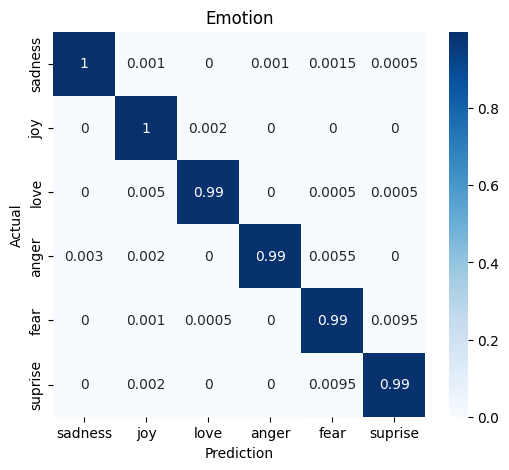

In [92]:
plot_cm(emotion_labels, emotion_pred, 'Emotion', emotion_labels_text)

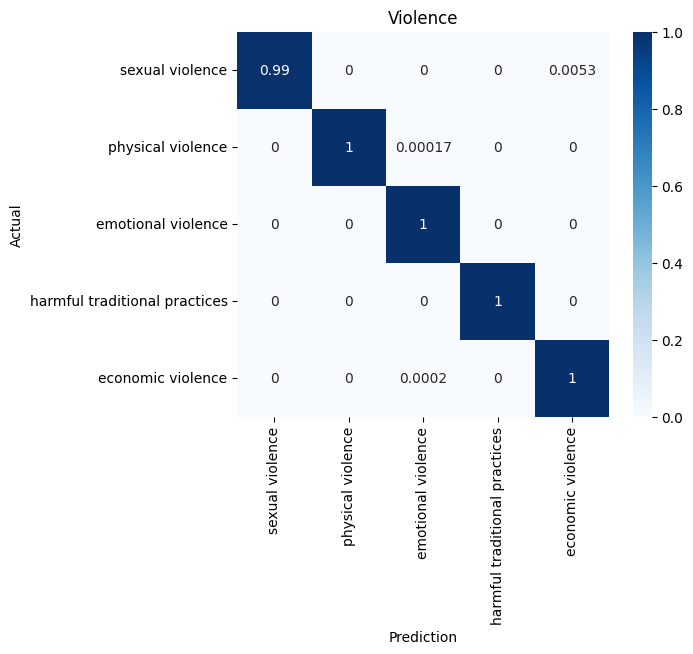

In [93]:
plot_cm(violence_labels, violence_pred, 'Violence', violence_labels_text)

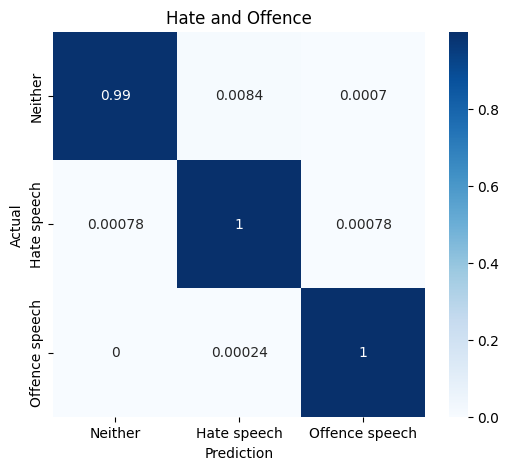

In [94]:
plot_cm(hateOffence_labels, hateOffence_pred, 'Hate and Offence', hateOffence_labels_text)

In [143]:
def classify_text(input_text):
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post')

    prediction = model.predict({
        'emotion_input' : input_padded,
        'violence_input' : input_padded,
        'hateOffence_input' : input_padded
    }, verbose=0)

    # Get predicted class indices
    emotion_pred = np.argmax(prediction[0], axis=1)[0]
    violence_pred = np.argmax(prediction[1], axis=1)[0]
    hateOffence_pred = np.argmax(prediction[2], axis=1)[0]

    # Get maximum probabilities for each task
    emotion_conf = np.max(prediction[0])
    violence_conf = np.max(prediction[1])
    hateOffence_conf = np.max(prediction[2])

    # Determine which task has the highest confidence
    confidences = [emotion_conf, violence_conf, hateOffence_conf]
    major_label_index = np.argmax(confidences)

    # Map predicted index to actual label
    emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    violence_labels_text = ['sexual violence', 'physical violence', 'emotional violence', 'harmful traditional practices', 'economic violence']
    hateOffence_labels_text = ['Neither', 'Hate speech', 'Offence speech']
    major_labels = ['Emotion', 'Violence', 'Hate/Offence']

    if major_label_index == 0:
        return 'Emotion', emotion_labels_text[emotion_pred]
    elif major_label_index == 1:
        return 'Violence', violence_labels_text[violence_pred]
    else:
        return 'Hate/Offence', hateOffence_labels_text[hateOffence_pred]


In [145]:
input_text = "I feel very sad and scared about what happened"
major, sub = classify_text(input_text)
print("Major Label:", major)
print("Sub Label:", sub)

Major Label: Emotion
Sub Label: sadness
